In [2]:
library(ggpubr) #plot
library(rstatix) #easy statistical analyses

library(ggplot2)
library(tidyverse)
library(reshape)

In [3]:
# 1.define dimensions
# neutral_dim = c('Activeness','Activity.Intensity','Uniqueness','Endurance')
psy_dim = c('Intimacy','Love.Expression','Attachment','Importance.for.individuals')
phy_dim = c('Synchronicity','Spatial.Distance')
dimension_selection = c(psy_dim,phy_dim)

In [4]:
# 2.1 raw data
USA_raw = read.csv('../output_data/cleaning_results/USA/USA_combine_dim_rel_scaled_33d.csv',
                   row.names=1)
CHN_raw = read.csv('../output_data/cleaning_results/CHN/CHN_dim_rel_scaled_NLP_159r_33d.csv',
                   row.names=1)
# 2.2 pca data
USA_pca = read.csv('../output_data/pca_results/USA/USA_scores_var_33d.csv',
                   row.names=1)
colnames(USA_pca) = c('Formality','Activeness','Valence','Exchange','Equality')
USA_pca$'Equality' = -USA_pca$'Equality'

CHN_pca = read.csv('../output_data/pca_results/CHN/CHN_NLP_159rel_33d_scores_var.csv',
                   row.names=1)
colnames(CHN_pca) = c('Valence','Exchange','Equality','Formality','Activeness')
CHN_pca$'Valence' = -CHN_pca$'Valence'
CHN_pca$'Equality' = -CHN_pca$'Equality'
CHN_pca$'Formality' = -CHN_pca$'Formality'

# 3.loading weight
USA_loadings_var = read.csv('../output_data/pca_results/USA/USA_loadings_var_33d.csv',
                       row.names=1)
CHN_loadings_var = read.csv('../output_data/pca_results/CHN/CHN_NLP_159rel_33d_loadings_var.csv',
                       row.names=1)

colnames(USA_loadings_var) = c('Formality','Activeness','Valence','Exchange','Equality')
USA_Activeness = abs(USA_loadings_var['Activeness'])
colnames(CHN_loadings_var) = c('Valence','Exchange','Equality','Formality','Activeness')
CHN_Activeness = abs(CHN_loadings_var['Activeness'])

# Define Distant relationships
CHN/USA were selected as the tail 30 relationships in the Activeness dimension. In other words, "Distant" relationships are the relationship with low score of "Activeness" in FAVEE.

In [6]:
# separate distant
USA_diff_Distant_rel = rownames(USA_pca[order(USA_pca$Activeness),])[1:30]
CHN_diff_Distant_rel = rownames(CHN_pca[order(CHN_pca$Activeness),])[1:30]

print('USA:distant')
USA_diff_Distant_rel
write.csv(USA_diff_Distant_rel,'selected_rels/USA_activeness.csv')
print('CHN:distant')
CHN_diff_Distant_rel
write.csv(CHN_diff_Distant_rel,'selected_rels/CHN_activeness.csv')
print('intersection of USA and CHN: distant')
intersect(USA_diff_Distant_rel,CHN_diff_Distant_rel)

[1] "USA:distant"


[1] "Between strangers"                               
 [2] "Celebrity and Haters"                            
 [3] "Between a person and their deceased spouse"      
 [4] "Celebrity and Fans"                              
 [5] "Between ex-lovers"                               
 [6] "Ancestor and Descendant"                         
 [7] "Between a person and their social media follower"
 [8] "Between distant relatives"                       
 [9] "Reader and Writer"                               
[10] "Between pen-friends"                             
[11] "Between Facebook Friends"                        
[12] "Between divorced spouses"                        
[13] "Between alumni"                                  
[14] "Between second cousins"                          
[15] "Between fans of opposing sports teams"           
[16] "Man Wife and Man Mistress"                       
[17] "Between casual acquaintances"                    
[18] "Chef and Customer"                               
[19] "Between frenemies"                               
[20] "Between business rivals"                         
[21] "Between long-distance lovers"                    
[22] "Native and Tourist"                              
[23] "Between cousins"                                 
[24] "Politician and Supporter"                        
[25] "Reviewer and Writer"                             
[26] "Between fans of the same sports team"            
[27] "Between enemies"                                 
[28] "Victim and Criminal"                             
[29] "Between a person and their crush"                
[30] "Landlord and Housekeeper"

[1] "CHN:distant"


[1] "Between strangers"                               
 [2] "Between casual acquaintances"                    
 [3] "Native and Tourist"                              
 [4] "Man and God"                                     
 [5] "Reader and Writer"                               
 [6] "Between a person and their social media follower"
 [7] "Between Facebook Friends"                        
 [8] "Between distant relatives"                       
 [9] "Celebrity and Fans"                              
[10] "Chef and Customer"                               
[11] "Reviewer and Writer"                             
[12] "Between a person and their family friends"       
[13] "Between frenemies"                               
[14] "Driver and Passenger"                            
[15] "Predecessor and Successor"                       
[16] "Between fans of opposing sports teams"           
[17] "Man Wife and Man Mistress"                       
[18] "Between fans of the same sports team"            
[19] "Celebrity and Haters"                            
[20] "Student and Dorm Resident assistant"             
[21] "Between second cousins"                          
[22] "Performer and Audience"                          
[23] "Between a person and their crush"                
[24] "Judge and Contestant"                            
[25] "Television host and Guest"                       
[26] "Customer and Businessman"                        
[27] "Between romantic rivals"                         
[28] "Between companions"                              
[29] "Representative and Citizen"                      
[30] "Dealer and Buyer"

[1] "intersection of USA and CHN: distant"


[1] "Between strangers"                               
 [2] "Celebrity and Haters"                            
 [3] "Celebrity and Fans"                              
 [4] "Between a person and their social media follower"
 [5] "Between distant relatives"                       
 [6] "Reader and Writer"                               
 [7] "Between Facebook Friends"                        
 [8] "Between second cousins"                          
 [9] "Between fans of opposing sports teams"           
[10] "Man Wife and Man Mistress"                       
[11] "Between casual acquaintances"                    
[12] "Chef and Customer"                               
[13] "Between frenemies"                               
[14] "Native and Tourist"                              
[15] "Reviewer and Writer"                             
[16] "Between fans of the same sports team"            
[17] "Between a person and their crush"

# Calculate "Activeness" score
"Distant" is divided into two types: psychological and physical.  
Sum the weights to determine the psychological or physical score of each relationship in terms of "Activeness".

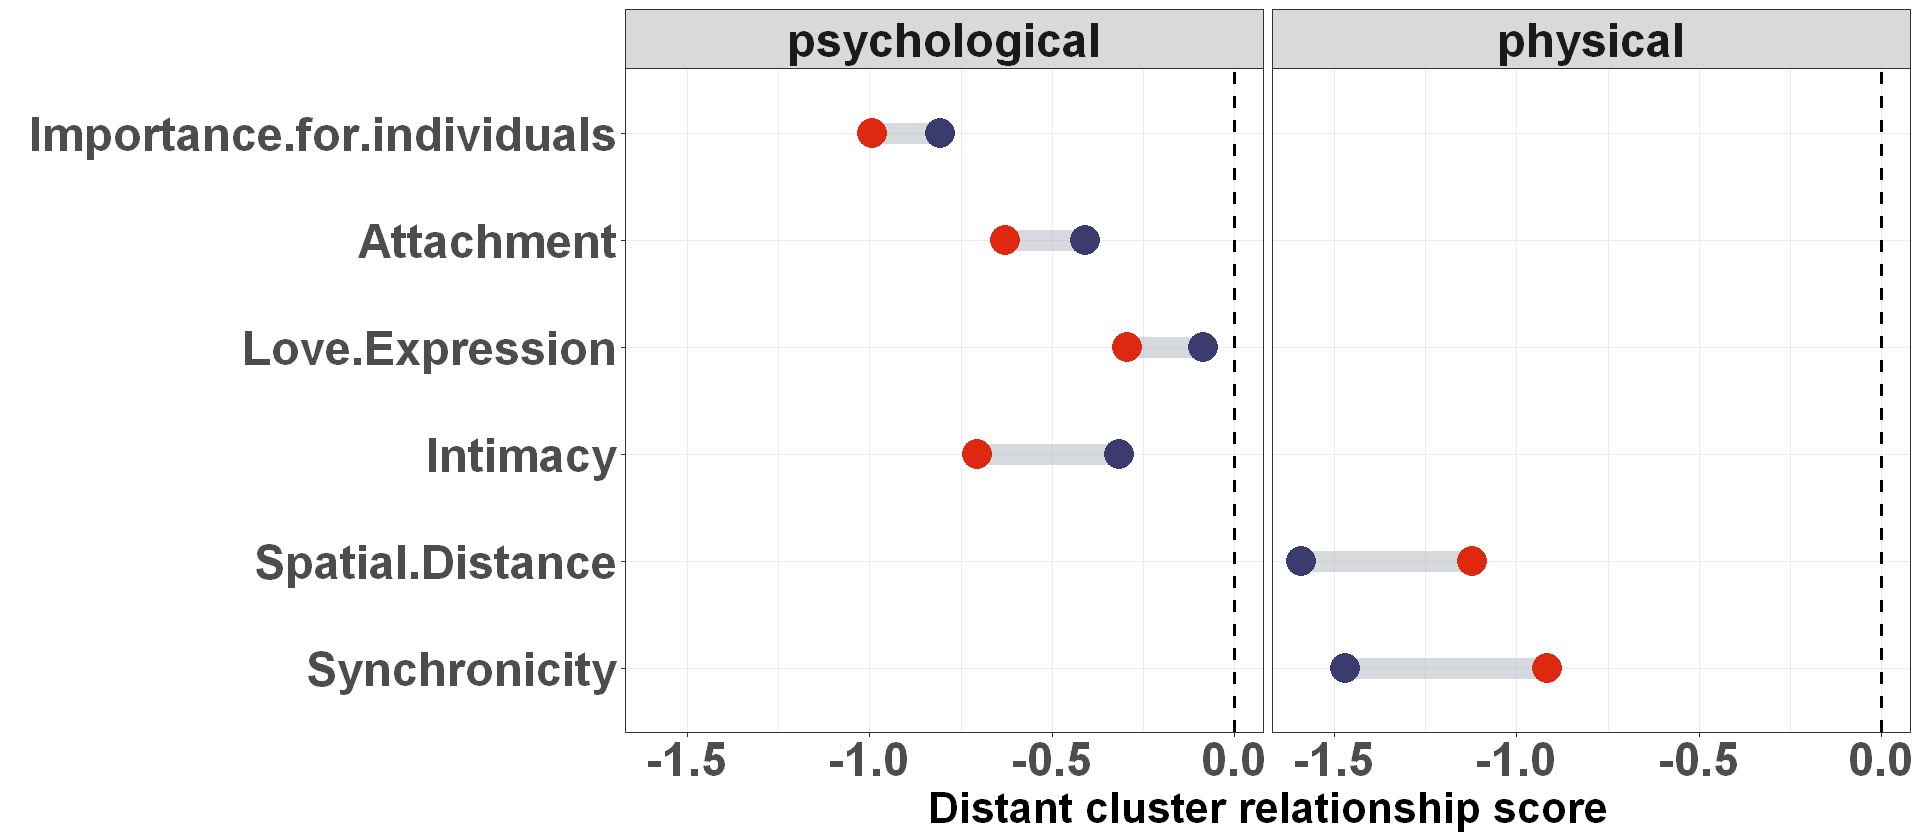

In [7]:
# 1.visualize the mean value in separate dimensions
# abstract data required from raw data
USA_raw_dist = USA_raw[USA_diff_Distant_rel,c(psy_dim,phy_dim)]
CHN_raw_dist = CHN_raw[CHN_diff_Distant_rel,c(psy_dim,phy_dim)]

# mean
USA_mean = apply(USA_raw_dist,2,mean)
CHN_mean = apply(CHN_raw_dist,2,mean)
USA_CHN_mean = data.frame(cbind(USA_mean,CHN_mean))
colnames(USA_CHN_mean) = c('USA','CHN')
USA_CHN_mean$'dim' = rownames(USA_CHN_mean)



USA_CHN_mean = USA_CHN_mean %>% mutate(dist_mean = case_when(
                                        dim %in% psy_dim~'psychological',
                                        dim %in% phy_dim~'physical'))

USA_CHN_mean %>% mutate(diff = USA - CHN) %>% #calculate difference
pivot_longer(cols = c(USA, CHN)) -> dat_mean
colnames(dat_mean) = c('dim','dist_mean','diff','region','score')

dat_mean$dist_mean <- factor(dat_mean$dist_mean, levels = c('psychological','physical'))

USA <- dat_mean %>% filter(region == "USA")
CHN <- dat_mean %>% filter(region == "CHN")

#USA_CHN_mean
my_color = c('USA'='#3C3B6E','CHN'='#DE2910')
options(repr.plot.width = 16)
ggplot(dat_mean)+
geom_segment(data = CHN,aes(x = score, y = dim, yend = USA$dim, xend = USA$score),
              color = "#aeb6bf",size = 6, alpha = .5) +
geom_point(aes(x = score, y = dim, color = region), size = 8, show.legend = TRUE)+
facet_wrap(~dist_mean,ncol=3)+
scale_color_manual(values=my_color)+
geom_vline(xintercept = 0,linetype='dashed',size = 1)+

scale_y_discrete(limits = c(phy_dim,psy_dim))+

ylab('')+
xlab('Distant cluster relationship score')+
theme_bw()+
theme(strip.text = element_text(face = 'bold',size = 28),
      axis.text.x = element_text(face = 'bold',size=28),
      axis.text.y = element_text(face = 'bold',size=28),
      legend.position = 'none',
      axis.title.x = element_text(size=26, face = 'bold'))

In [9]:
################################################
# 2.caculate Activeness score in corresponding dimensions
# USA
USA_weight_dist = data.frame(rel = rownames(USA_raw_dist),psy = 0, phy = 0) 
rownames(USA_weight_dist) = USA_weight_dist$rel

for (rel in rownames(USA_raw_dist)){
    weight_sum = 0 # loading score in one domain(psy/phy)
    raw_weight_sum = 0 # sum(raw_scaled * loading score)
    for (dim in psy_dim){
        weight = USA_Activeness[dim,] # loading score
        count = 1
        weight_sum = weight_sum + count
        raw_weight = USA_raw_dist[rel,dim]*weight # raw_scaled * loading score
        raw_weight_sum = raw_weight_sum + raw_weight

        weight_result = raw_weight_sum / weight_sum
        weight_result = raw_weight_sum
        USA_weight_dist[rel,'psy'] = weight_result
    }
}

for (rel in rownames(USA_raw_dist)){
    weight_sum = 0 
    raw_weight_sum = 0 
    for (dim in phy_dim){
        weight = USA_Activeness[dim,] 
        count = 1
        weight_sum = weight_sum + count
        raw_weight = USA_raw_dist[rel,dim]*weight 
        raw_weight_sum = raw_weight_sum + raw_weight

        weight_result = raw_weight_sum / weight_sum
        weight_result = raw_weight_sum
        USA_weight_dist[rel,'phy'] = weight_result
    }
}

# print('USA')
# apply(USA_weight_dist[c('psy','phy')],2,mean)


# CHN
CHN_weight_dist = data.frame(rel = rownames(CHN_raw_dist),psy = 0, phy = 0) 
rownames(CHN_weight_dist) = CHN_weight_dist$rel

for (rel in rownames(CHN_raw_dist)){
    weight_sum = 0 # loading score in one domain(psy/phy)
    raw_weight_sum = 0 # sum(raw_scaled * loading score)
    for (dim in psy_dim){
        weight = CHN_Activeness[dim,] # loading score
        count = 1
        weight_sum = weight_sum + count
        raw_weight = CHN_raw_dist[rel,dim]*weight # raw_scaled * loading score
        raw_weight_sum = raw_weight_sum + raw_weight

        weight_result = raw_weight_sum / weight_sum
        weight_result = raw_weight_sum
        CHN_weight_dist[rel,'psy'] = weight_result
    }
}

for (rel in rownames(CHN_raw_dist)){
    weight_sum = 0 
    raw_weight_sum = 0 
    for (dim in phy_dim){
        weight = CHN_Activeness[dim,] 
        count = 1
        weight_sum = weight_sum + count
        raw_weight = CHN_raw_dist[rel,dim]*weight 
        raw_weight_sum = raw_weight_sum + raw_weight

        weight_result = raw_weight_sum / weight_sum
        weight_result = raw_weight_sum
        CHN_weight_dist[rel,'phy'] = weight_result
    }
}

# print('CHN')
# apply(CHN_weight_dist[c('psy','phy')],2,mean)

In [10]:
USA_weight_dist
CHN_weight_dist

,rel,psy,phy
,<chr>,<dbl>,<dbl>
Between strangers,Between strangers,-2.91920697,-4.8697494
Celebrity and Haters,Celebrity and Haters,-2.54066880,-4.7837123
Between a person and their deceased spouse,Between a person and their deceased spouse,2.09533148,-4.5991102
Celebrity and Fans,Celebrity and Fans,-1.12204014,-4.2505084
Between ex-lovers,Between ex-lovers,-0.74311566,-4.1645471
Ancestor and Descendant,Ancestor and Descendant,-0.30044532,-4.7872415
Between a person and their social media follower,Between a person and their social media follower,-0.95717055,-3.0903611
Between distant relatives,Between distant relatives,-0.95879801,-3.4728400
Reader and Writer,Reader and Writer,-0.63529506,-4.5359750


,rel,psy,phy
,<chr>,<dbl>,<dbl>
Between strangers,Between strangers,-3.9136863,-3.65549735
Between casual acquaintances,Between casual acquaintances,-2.3238540,-2.70187620
Native and Tourist,Native and Tourist,-2.8210793,-2.08054996
Man and God,Man and God,-0.2747061,-3.10936701
Reader and Writer,Reader and Writer,-0.3948203,-2.48882880
Between a person and their social media follower,Between a person and their social media follower,-0.5879737,-1.72289167
Between Facebook Friends,Between Facebook Friends,-0.6546249,-2.12949887
Between distant relatives,Between distant relatives,-0.3984486,-2.55512098
Celebrity and Fans,Celebrity and Fans,-0.2168127,-1.70316849


# ANOVA

Warning message:
"The 'wid' column contains duplicate ids across between-subjects variables. Automatic unique id will be created"


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,region,1,58,1.242,2.70e-01,,0.012
2,meaning,1,58,17.769,8.84e-05,*,0.121
3,region:meaning,1,58,20.393,3.14e-05,*,0.136


meaning,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif,y.position,groups,x,xmin,xmax
<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>,<dbl>
psy,raw_weight,CHN,USA,30,30,0.039100,*,0.039100,*,2.827,"CHN, USA",1,0.8,1.2
phy,raw_weight,CHN,USA,30,30,0.000175,***,0.000175,***,1.520,"CHN, USA",2,1.8,2.2


Group.1,Group.2,x
<chr>,<fct>,<dbl>
CHN,psy,-1.4936692
USA,psy,-0.7643684
CHN,phy,-1.4268154
USA,phy,-2.7068968


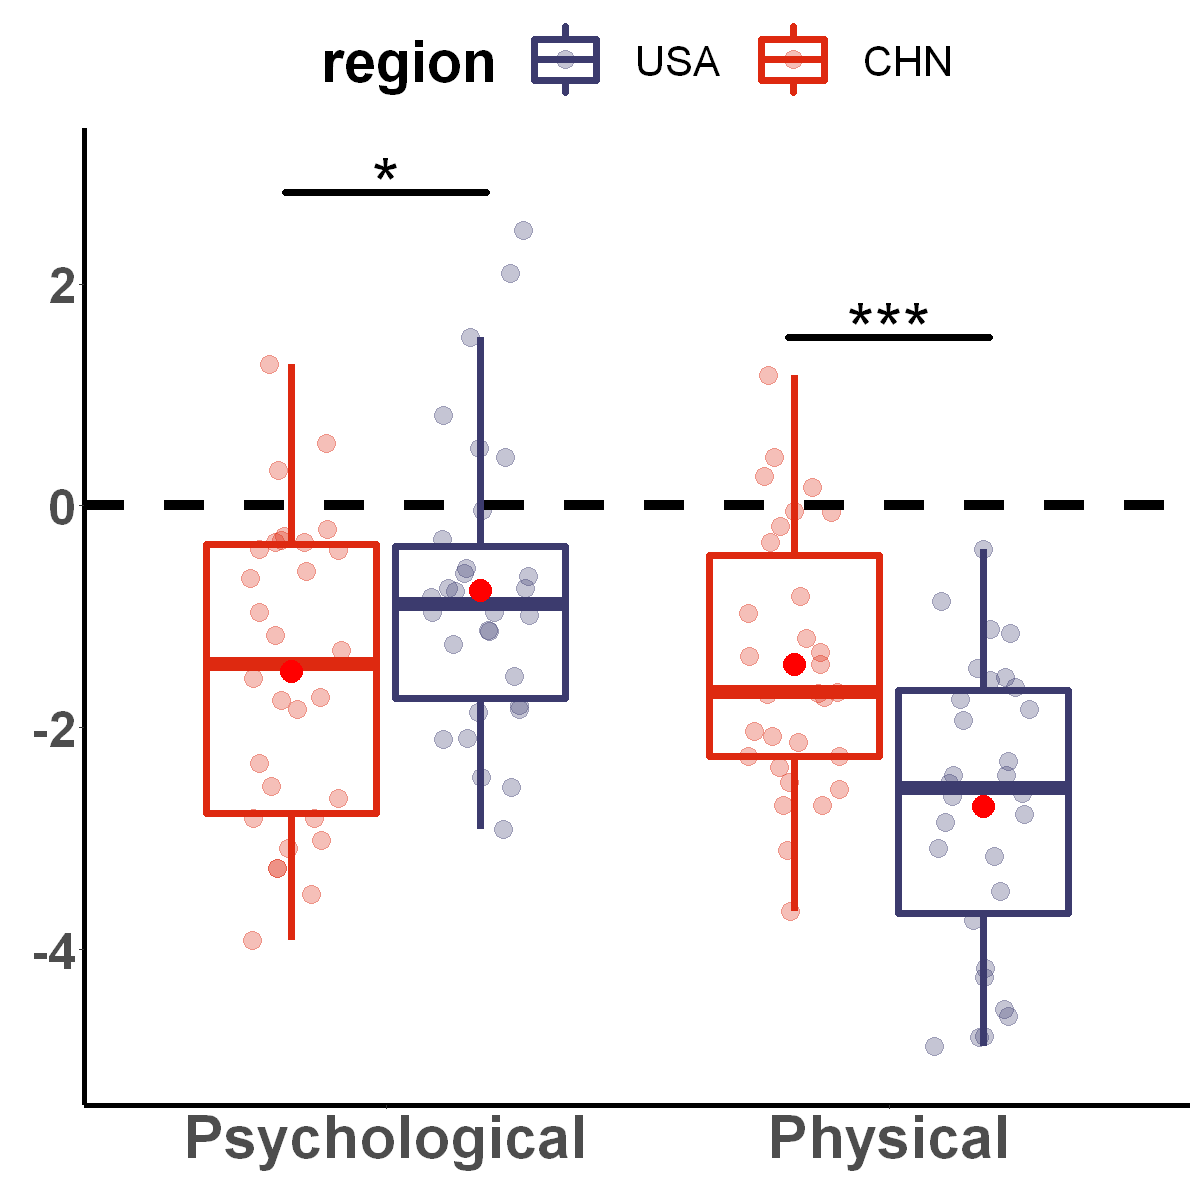

In [11]:
USA_weight_dist$region = 'USA'
CHN_weight_dist$region = 'CHN'

Inter_weight_dist = rbind(USA_weight_dist,CHN_weight_dist)
Inter_weight_dist_melt = melt(Inter_weight_dist,id.vars = c('rel','region'))
colnames(Inter_weight_dist_melt) = c('rel','region','meaning','raw_weight')

# Anova
res.aov = anova_test(
    data = Inter_weight_dist_melt,dv = raw_weight, wid = rel,
    between = region, within = meaning)
get_anova_table(res.aov)

# # Post hoc1
# one.way = Inter_weight_dist_melt %>% group_by(meaning) %>%
#     anova_test(dv = raw_weight, wid = rel, between = region) %>%
#     get_anova_table() %>%
#     adjust_pvalue(method = 'bonferroni')
# one.way

# Post hoc2
pwc <- Inter_weight_dist_melt %>%
  group_by(meaning) %>%
  pairwise_t_test(raw_weight ~ region,p.adjust.method = "bonferroni",paired = FALSE) 

pwc <- pwc %>% add_xy_position(x = "meaning")
pwc

# Visualization
options(repr.plot.width = 10,repr.plot.height = 10)
ggplot(Inter_weight_dist_melt)+
geom_boxplot(aes(x=meaning,y=raw_weight,color=region),
             outlier.alpha = 0,size=2)+
geom_point(aes(x=meaning,y=raw_weight,color=region),position = position_jitterdodge(0.2),size=5,alpha=0.3)+
stat_summary(aes(x=meaning,y=raw_weight,group=region),position=position_dodge(0.75),
             fun='mean',color='red',size=6,geom='point')+
scale_color_manual(values=my_color)+
geom_hline(yintercept = 0,linetype='dashed',size = 3)+
scale_x_discrete(labels = c("psy" = "Psychological","phy" = "Physical"))+

stat_pvalue_manual(pwc, tip.length = 0, hide.ns = TRUE,size = 15,bracket.size = 2)+

theme_classic()+
# theme(axis.text.x = element_text(size=40,face='bold'),
#       axis.text.y = element_text(size=20),
#       legend.key.size = unit(50,'pt'),
#       legend.title = element_text(size=35,face='bold'),
#       legend.text = element_text(size=25))+

theme(axis.text.x = element_text(size=36,face='bold'),
      axis.text.y = element_text(size=30,face='bold'),
#       axis.text.x = element_blank(),
#       axis.text.y = element_blank(),
      legend.key.size = unit(50,'pt'),
      legend.title = element_text(size=35,face='bold'),
      legend.text = element_text(size=25),
      axis.line = element_line(linetype=1,color="black",size=1.5),
      legend.position = 'top')+

xlab('')+
ylab('')+
ylim(-5,3)

aggregate(Inter_weight_dist_melt$raw_weight,by=list(Inter_weight_dist_melt$region,
                                                   Inter_weight_dist_melt$meaning),mean)

In [13]:
# Visualization
png("../../output_graph/USA_CHN/Activeness.png", bg="transparent",
    family = 'sans',units='in',width=10,height=10,res=300)

options(repr.plot.width = 7,repr.plot.height = 7)
ggplot(Inter_weight_dist_melt)+
geom_boxplot(aes(x=meaning,y=raw_weight,color=region),
             outlier.alpha = 0,size=2)+
geom_point(aes(x=meaning,y=raw_weight,color=region),position = position_jitterdodge(0.2),size=5,alpha=0.3)+
stat_summary(aes(x=meaning,y=raw_weight,group=region),position=position_dodge(0.75),
             fun='mean',color='red',size=6,geom='point')+
scale_color_manual(values=my_color)+
geom_hline(yintercept = 0,linetype='dashed',size = 3)+
scale_x_discrete(labels = c("psy" = "Psychological","phy" = "Physical"))+

#stat_pvalue_manual(pwc, tip.length = 0, hide.ns = TRUE,size = 15,bracket.size = 2)+

theme_classic()+
# theme(axis.text.x = element_text(size=40,face='bold'),
#       axis.text.y = element_text(size=20),
#       legend.key.size = unit(50,'pt'),
#       legend.title = element_text(size=35,face='bold'),
#       legend.text = element_text(size=25))+

theme(#axis.text.x = element_text(size=36,face='bold'),
      #axis.text.y = element_text(size=30,face='bold'),
      axis.text.x = element_blank(),
      axis.text.y = element_blank(),
      legend.key.size = unit(50,'pt'),
      legend.title = element_text(size=35,face='bold'),
      legend.text = element_text(size=25),
      axis.line = element_line(linetype=1,color="black",size=1.5),
      legend.position = 'top')+

xlab('')+
ylab('')+
ylim(-5,3)

aggregate(Inter_weight_dist_melt$raw_weight,by=list(Inter_weight_dist_melt$region,
                                                   Inter_weight_dist_melt$meaning),mean)
dev.off()

Group.1,Group.2,x
<chr>,<fct>,<dbl>
CHN,psy,-1.4936692
USA,psy,-0.7643684
CHN,phy,-1.4268154
USA,phy,-2.7068968


png 
  2